In [2]:
# load libraries

import openslide
import os
import matplotlib.pyplot as plt
import glob
import cv2
from utils.plot_methods import ploting_multiple_images

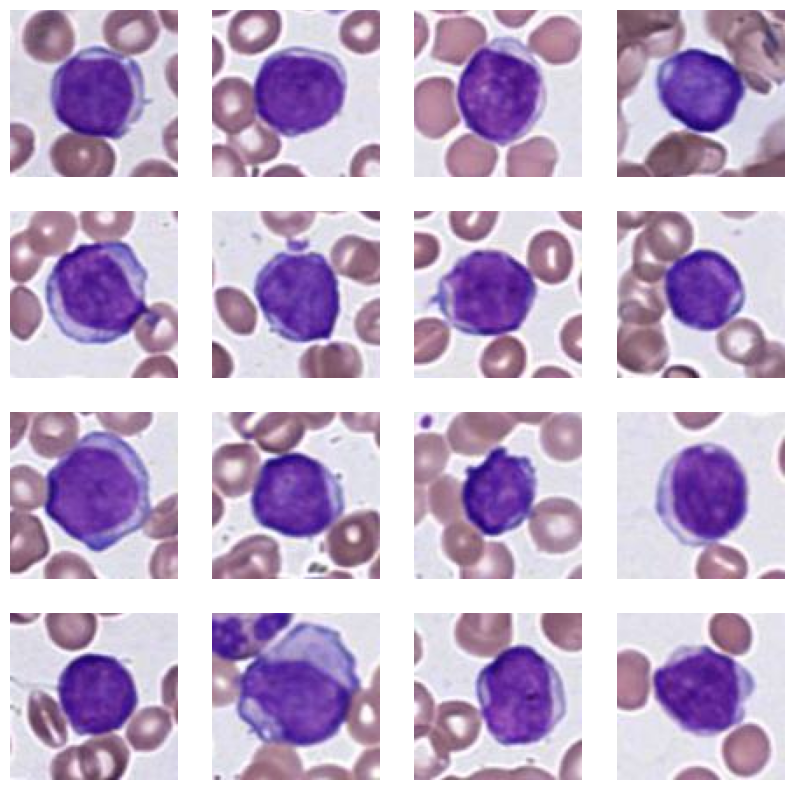

In [15]:
_plot = ploting_multiple_images(folder_path='./wbc_harry/M1/')
_plot.plot()

447


ValueError: num must be 1 <= num <= 6, not 7

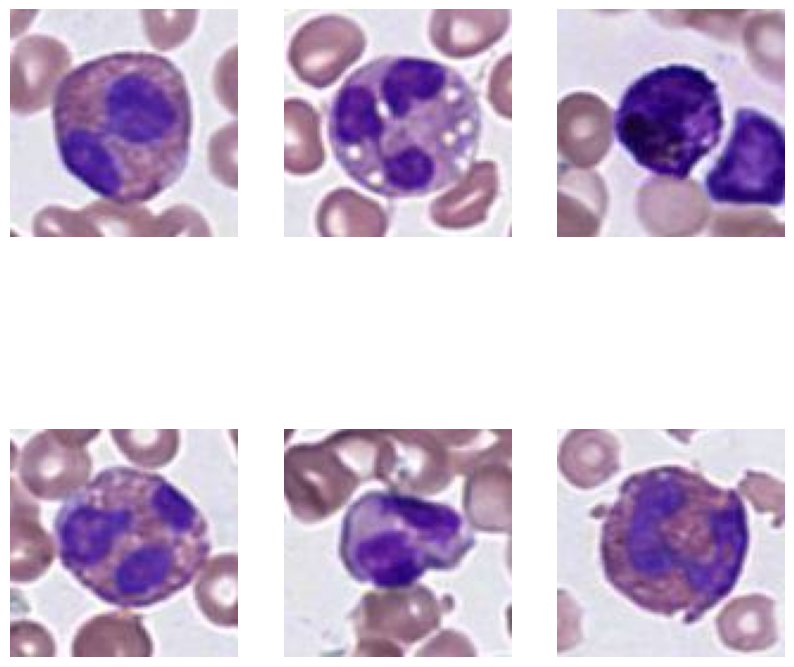

In [31]:
_plot = ploting_multiple_images(folder_path='./wbc_harry/E4/',
                                number_of_images=8,
                                random=True)
_plot.plot()

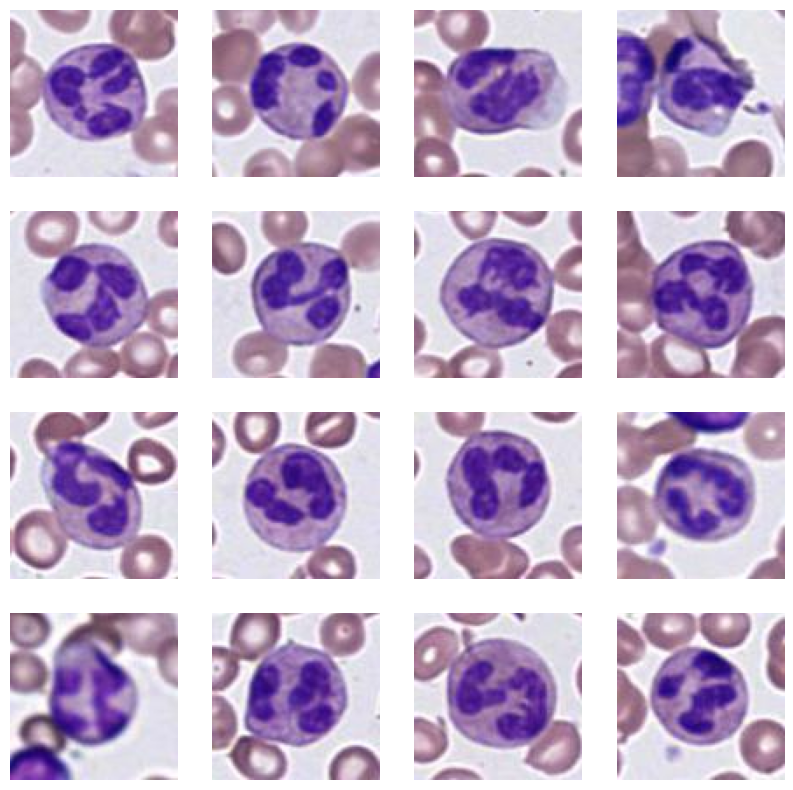

In [5]:
_plot = ploting_multiple_images(folder_path='./wbc_harry/M6/',)
_plot.plot()

In [2]:
### img dir here
img_path = '/media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/slides/H18-2459_S10_MSKC_2023-05-31_16.29.27.ndpi'

In [3]:
print(f"Operating on slide {img_path.split('/')[-1]}")
slide = openslide.OpenSlide(img_path)

print(f" THE DIMENSION OF THE SLIDE：{slide.level_dimensions[0]}")
print(f" File size: {round(os.path.getsize(img_path) / 1024 ** 2, 2)} MB")


Operating on slide H18-2459_S10_MSKC_2023-05-31_16.29.27.ndpi
 THE DIMENSION OF THE SLIDE：(207360, 105984)
 File size: 3335.89 MB


In [ ]:
### NOT NECESSARY 



def visualize_whole_slide(image_dir = None,
                         level = 0):
    img_path = image_dir
    slide = openslide.OpenSlide(img_path)
    region = (0, 0)
    #size = (6600, 3240)
    size = slide.level_dimensions[level]
    region = slide.read_region(region, level, size)
    plt.figure(figsize=(20, 20))
    plt.imshow(region)

visualize_whole_slide(image_dir=img_path,
                     level = 5)

def visualize_whole_slide(image_dir = None, level = 0): 
    img_path = image_dir 
    slide = openslide.OpenSlide(img_path) 
    region = (0, 0)

    #size = (6600, 3240)
    size = slide.level_dimensions[level]
    region = slide.read_region(region, level, size)
    plt.figure(figsize=(20, 20))
    plt.imshow(region)

visualize_whole_slide(image_dir=img_path, level = 7)


In [42]:
ls /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/patches/ |wc -l

16


In [7]:
!python Patching.py --save_destination /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/patches/ --wsi_dir /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/slides/ --wsi_name H18-2459_S10_MSKC_2023-05-31_16.29.27.ndpi

wtf
100%|█████████████████████████████████████████| 405/405 [21:33<00:00,  3.19s/it]


# Select Good quality regions

In [9]:
ls /media/hdd3/harry/Slides_repo/patches

ls: cannot access '/media/hdd3/harry/Slides_repo/patches': No such file or directory


In [11]:
patch_dir = '/media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/patches/'+img_path.split('/')[-1].split('.ndpi')[0]+'patches/'
print(patch_dir)

/media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/patches/H18-2459_S10_MSKC_2023-05-31_16.29.27patches/


In [16]:
print(f"{patch_dir.split('/patches/')[0]}/results/{patch_dir.split('/patches/')[1].split('patches')[0]}slide_res/")

/media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/results/H18-2459_S10_MSKC_2023-05-31_16.29.27slide_res/


In [ ]:
patch_repo_dir = "/media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/results/H18-2459_S10_MSKC_2023-05-31_16.29.27slide_res/"



In [27]:
ls /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/results/H18-2459_S10_MSKC_2023-05-31_16.29.27slide_res/

H18-2075_S10_MSKG_2023-06-05_19.10.12slide_res/
H18-2459_S10_MSKC_2023-05-31_16.29.27slide_res/


In [18]:
patch_repo_dir = "/media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/results/H18-2459_S10_MSKC_2023-05-31_16.29.27slide_res/"


In [23]:
ls /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/results/H18-2075_S10_MSKG_2023-06-05_19.10.12slide_res/

extracted_cells/  H18-2075_S10_MSKG_2023-06-05_19.10.12.csv*


In [21]:
ID = patch_repo_dir.split('results')[1].split('/')[-2].split('slide_res')[0]
ID

'H18-2459_S10_MSKC_2023-05-31_16.29.27'

In [28]:
!python Region_classifier.py --patch_repo_dir /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/patches/H18-2459_S10_MSKC_2023-05-31_16.29.27patches --save_vis False

Using cache found in /home/harry/.cache/torch/hub/pytorch_vision_v0.10.0
100%|███████████████████████████████████████| 2620/2620 [08:02<00:00,  5.43it/s]
Finished computing the prob logits for the region quality
Saving results
Saving the quality score table
H18-2459_S10_MSKC_2023-05-31_16.29.27
Saving the visulization as well
Traceback (most recent call last):
  File "Region_classifier.py", line 148, in <module>
    assert 1==2, "The visulization method is not ready yet！Some errors that I will fix when I have time"
AssertionError: The visulization method is not ready yet！Some errors that I will fix when I have time


In [30]:
!python Cell_detector.py --patch_repo_dir /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/patches/H18-2459_S10_MSKC_2023-05-31_16.29.27patches/

../HemeYolo/yolov3-custom.cfg
../HemeYolo/yolov3-custom.cfg
did you get activated?
length of model list
107
Loading the quality score from previous results
There are many good regions, we subset 300 regions with the best confidence. For quality and speed
0it [00:00, ?it/s]/home/harry/anaconda3/envs/hemeyolo/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
300it [00:18, 15.84it/s]
Done


In [31]:
!python Cell_classifier.py --patch_repo_dir /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/patches/H18-2459_S10_MSKC_2023-05-31_16.29.27patches 

Using cache found in /home/harry/.cache/torch/hub/pytorch_vision_v0.10.0
Done with prediction
Let's sort them into the different folders
I need an assertation statetment to make this really correct!


patch_109056_64512_x211_y309.png  patch_72704_61952_x336_y338.png
patch_112128_60416_x175_y149.png  patch_73728_61440_x365_y447.png
patch_112640_60928_x364_y205.png  patch_75264_63488_x220_y455.png
patch_114176_58368_x49_y428.png   patch_75264_63488_x286_y461.png
patch_114176_62976_x177_y308.png  patch_87552_24576_x254_y69.png
patch_114688_58368_x164_y299.png  patch_88064_25088_x321_y151.png
patch_114688_58368_x180_y350.png  patch_89600_29184_x148_y376.png
patch_114688_71680_x281_y306.png  patch_92160_24064_x348_y146.png
patch_115200_71680_x122_y327.png  patch_92160_27136_x388_y380.png
patch_116224_59392_x398_y330.png  patch_92672_26624_x450_y304.png
patch_116224_61952_x284_y401.png  patch_92672_29696_x168_y409.png
patch_116736_61952_x343_y56.png   patch_94208_29696_x230_y187.png
patch_119296_62464_x93_y126.png   patch_96256_29696_x224_y462.png
patch_124416_67072_x140_y192.png


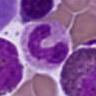

In [21]:
test_dir =  '/media/hdd3/harry/Slides_repo/H18-2075_S10_MSKG_2023-06-05_19.10.12slide_res/extracted_cells/M5/patch_79872_92672_x209_y306.png'
from PIL import Image
Image.open(test_dir)

In [5]:
ls /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/

patches/  results/  slides/  table.csv*


In [6]:
ls /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/patches/

H18-2075_S10_MSKG_2023-06-05_19.10.12patches/
H18-2459_S10_MSKC_2023-05-31_16.29.27patches/
H18-8355_S10_MSKD_2023-06-20_19.40.36patches/
H22-3309_S10_MSKC_2023-03-23_16.37.23patches/


In [51]:
ls /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/results/

H18-2075_S10_MSKG_2023-06-05_19.10.12slide_res/


In [25]:
mv /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/*.ndpi /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/slides/

In [31]:
mv /media/hdd3/harry/Slides_repo/*patches /media/hdd3/harry/Slides_repo/Plasma_cel_myeloma/pateches/